<a href="https://colab.research.google.com/github/laym0ura/minicurso_contaminacao/blob/main/minicurso_contaminacao_solos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o Google Drive

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importação das bibliotecas necessárias

In [39]:
import pandas as pd  # Manipulação e análise de dados em formato de tabelas (DataFrames)
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações estáticas (parte do Matplotlib)
import seaborn as sns  # Visualizações estatísticas mais sofisticadas e estilizadas baseadas no Matplotlib
from scipy.stats import mannwhitneyu  # Teste de Mann–Whitney U
from sklearn.model_selection import train_test_split, cross_val_score  # Divide dados em treino/teste e realiza validação cruzada
from sklearn.neighbors import KNeighborsClassifier  # Algoritmo KNN para classificação supervisionada
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas para avaliar o desempenho do modelo
from sklearn.preprocessing import StandardScaler  # Padronização de dados (média = 0, desvio padrão = 1)
from sklearn.inspection import permutation_importance  # Mede a importância das variáveis no modelo
import numpy as np  # Operações matemáticas e manipulação de arrays numéricos
import math


# Análise Exploratória de Dados

## Leitura dos dados

In [40]:
dados = pd.read_csv('/content/drive/MyDrive/minicurso_contaminacao/solos.csv')

## Visualização das linhas dos dados

In [41]:
# Mostra as 5 primeiras linhas do dado
dados.head()

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,contaminated
0,1,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147.0,1115.0,91.32,0.894,27.06,1.768,0.40,0.0
1,2,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180.0,1055.0,60.04,3.660,17.58,1.684,0.41,0.0
2,3,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183.0,1215.0,61.24,3.060,18.00,1.840,0.46,1.0
3,4,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116.0,327.0,19.54,1.640,5.04,0.844,0.50,1.0
4,5,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228.0,939.0,25.84,0.180,7.16,1.216,0.40,1.0


## Informações dos Dados

Exibe informações gerais do DataFrame: número de linhas e colunas, nomes das colunas, quantidade de valores não nulos, tipos de dados e uso de memória.

In [42]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            981 non-null    int64  
 1   Sand %        981 non-null    float64
 2   Clay %        981 non-null    float64
 3   Silt %        981 non-null    float64
 4   pH            981 non-null    float64
 5   EC mS/cm      981 non-null    float64
 6   O.M. %        981 non-null    float64
 7   CACO3 %       981 non-null    float64
 8   N_NO3 ppm     981 non-null    float64
 9   P ppm         981 non-null    float64
 10  K ppm         981 non-null    float64
 11  Mg ppm        981 non-null    float64
 12  Fe ppm        981 non-null    float64
 13  Zn ppm        981 non-null    float64
 14  Mn ppm        979 non-null    float64
 15  Cu ppm        981 non-null    float64
 16  B ppm         981 non-null    float64
 17  contaminated  981 non-null    float64
dtypes: float64(17), int64(1)
memor

## Visualização das colunas

In [43]:
# Lista os nomes de todas as colunas do DataFrame
dados.columns

Index(['ID', 'Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %',
       'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm',
       'Mn ppm', 'Cu ppm', 'B ppm', 'contaminated'],
      dtype='object')

In [44]:
# Remove a coluna "ID" do DataFrame, pois não é útil para a análise
# inplace=True garante que a mudança é feita diretamente no DataFrame "dados"
dados.drop(columns = 'ID', inplace = True)

## Análise dos dados nulos

In [45]:
# Verifica valores nulos em cada coluna do DataFrame
# Retorna a soma de valores ausentes (NaN) por coluna
dados.isnull().sum()

,0
Sand %,0
Clay %,0
Silt %,0
pH,0
EC mS/cm,0
O.M. %,0
CACO3 %,0
N_NO3 ppm,0
P ppm,0
K ppm,0


In [46]:
# Remove todas as linhas que contenham valores nulos (NaN) no DataFrame
# inplace=True garante que a alteração seja aplicada diretamente no Dataframe
dados.dropna(inplace=True)

In [47]:
dados.isnull().sum()

,0
Sand %,0
Clay %,0
Silt %,0
pH,0
EC mS/cm,0
O.M. %,0
CACO3 %,0
N_NO3 ppm,0
P ppm,0
K ppm,0


## Estatísticas Descritivas

Exibe estatísticas descritivas das colunas numéricas: média, desvio padrão, valores mínimo e máximo, e também os quartis (25%, 50% e 75%).

In [48]:
dados.describe()

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,contaminated
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,31.553487,34.821402,33.625110,7.146605,0.453634,2.020844,13.573651,11.420545,13.967692,296.179775,813.448417,30.801430,0.688351,15.636600,1.985466,0.380657,0.797753
std,11.403125,11.562503,8.732163,0.883972,0.288153,0.635525,13.423630,10.752060,15.207474,194.771778,734.571400,25.522707,0.728121,14.577996,2.293876,0.219095,0.401881
min,7.127755,5.550217,10.584058,4.490000,0.134000,0.370000,0.000000,0.180000,1.070000,31.000000,60.000000,4.630000,0.100000,2.380000,0.210000,0.100000,0.000000
25%,23.820143,26.717878,28.000000,6.655000,0.337500,1.570000,1.846565,5.200000,5.674100,169.500000,360.500000,13.135000,0.304287,6.720000,1.032194,0.221198,1.000000
50%,30.000000,35.440749,32.000000,7.550000,0.404000,1.960000,8.976108,8.743451,9.320000,257.000000,554.000000,20.050000,0.488700,10.210000,1.480000,0.350000,1.000000
75%,40.000000,44.000000,38.146411,7.780000,0.499830,2.372588,22.053131,14.108712,16.190000,355.000000,989.500000,42.111687,0.780000,18.920000,2.145000,0.470000,1.000000
max,72.682902,76.788774,68.000000,8.200000,5.621000,4.980000,77.600000,120.640000,152.420000,1665.000000,4836.000000,187.940000,7.090000,189.210000,33.910000,1.900000,1.000000


## Interpretação Estatística dos Dados

O conjunto possui **979 amostras** de solo com 16 variáveis físico-químicas + a variável-alvo `contaminated`.

###  Granulometria
- **Areia (Sand %)**: varia de 7,12% a 72,68%, com média de ~31%.  
- **Argila (Clay %)**: entre 5,55% e 76,79%, média de ~35%.  
- **Silte (Silt %)**: entre 10,58% e 68%, média de ~33%.  

As três frações se distribuem de forma variada, indicando solos de diferentes texturas.

###  Propriedades Químicas
- **pH**: varia de 4.49 (ácido) a 8.20 (alcalino), com mediana 7.55.  
- **Condutividade elétrica (EC mS/cm)**: maioria entre 0.13 e 0.50, mas há casos extremos até 5.62 (alta salinidade).  
- **Matéria Orgânica (O.M. %)**: média em torno de 2%, variando de 0.37% a 4.98%.  
- **Carbonato de Cálcio (CACO3 %)**: bastante variável (0 a 77.6%), média de ~13%.  

### Nutrientes Principais
- **N-NO3 (ppm)**: média 11.42, com valores que chegam a 120 ppm..  
- **Fósforo (P ppm)**: mediana 9.5, mas máximo de 152 ppm.
- **Potássio (K ppm)**: média 296 ppm, podendo chegar a 1665 ppm.
- **Magnésio (Mg ppm)**: média 813 ppm, mas extremos até 4836 ppm.  

### Micronutrientes e Metais
- **Ferro (Fe ppm)**: média 31, mas há amostras até 188 ppm.  
- **Zinco (Zn ppm)**: concentrado em valores baixos (~0.69 ppm), máximo 7 ppm.  
- **Manganês (Mn ppm)**: média 15, mas máximo 189 ppm.  
- **Cobre (Cu ppm)**: média 2 ppm, podendo atingir 34 ppm.  
- **Boro (B ppm)**: em torno de 0.38 ppm, máximo 1.9 ppm.  



## Visualização das classes

In [49]:
# Conta quantas amostras existem em cada classe
classes_solos = dados["contaminated"].value_counts()

In [50]:
classes_solos

,count
contaminated,
1.0,781
0.0,198


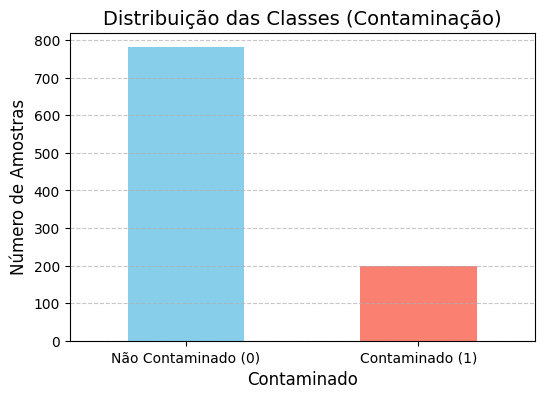

In [51]:
# Cria uma nova figura do Matplotlib e define o tamanho (largura=6", altura=4")
plt.figure(figsize=(6, 4))

# Plota 'classes_solos' como barras (
# 'color' define as cores das barras (duas cores, assumindo duas classes: 0 e 1)
classes_solos.plot(kind="bar", color=["skyblue", "salmon"])

# Define o título do gráfico e o tamanho da fonte
plt.title("Distribuição das Classes (Contaminação)", fontsize=14)

# Define o rótulo (nome) do eixo X e o tamanho da fonte
plt.xlabel("Contaminado", fontsize=12)

# Define o rótulo (nome) do eixo Y e o tamanho da fonte
plt.ylabel("Número de Amostras", fontsize=12)

# Ajusta manualmente as posições (0 e 1) e os rótulos dos ticks do eixo X; sem rotação
plt.xticks([0, 1], ["Não Contaminado (0)", "Contaminado (1)"], rotation=0)

# Adiciona grade apenas no eixo Y, com linha tracejada e transparência de 70%
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibe o gráfico na tela
plt.show()

Percebe-se que existe um forte desbalanceamento entre as classes. A maioria das amostras de solo está na categoria “Não Contaminado (0)”, representando cerca de 80% do total, enquanto apenas 20% das amostras aparecem como “Contaminado (1)”.

Isso é um ponto essencial em análise de dados, porque em situações de classes desbalanceadas os modelos de machine learning podem acabar favorecendo a classe majoritária, obtendo uma acurácia aparentemente alta, mas sem realmente identificar bem os casos de contaminação. Será nosso caso?

## Histogramas das variáveis

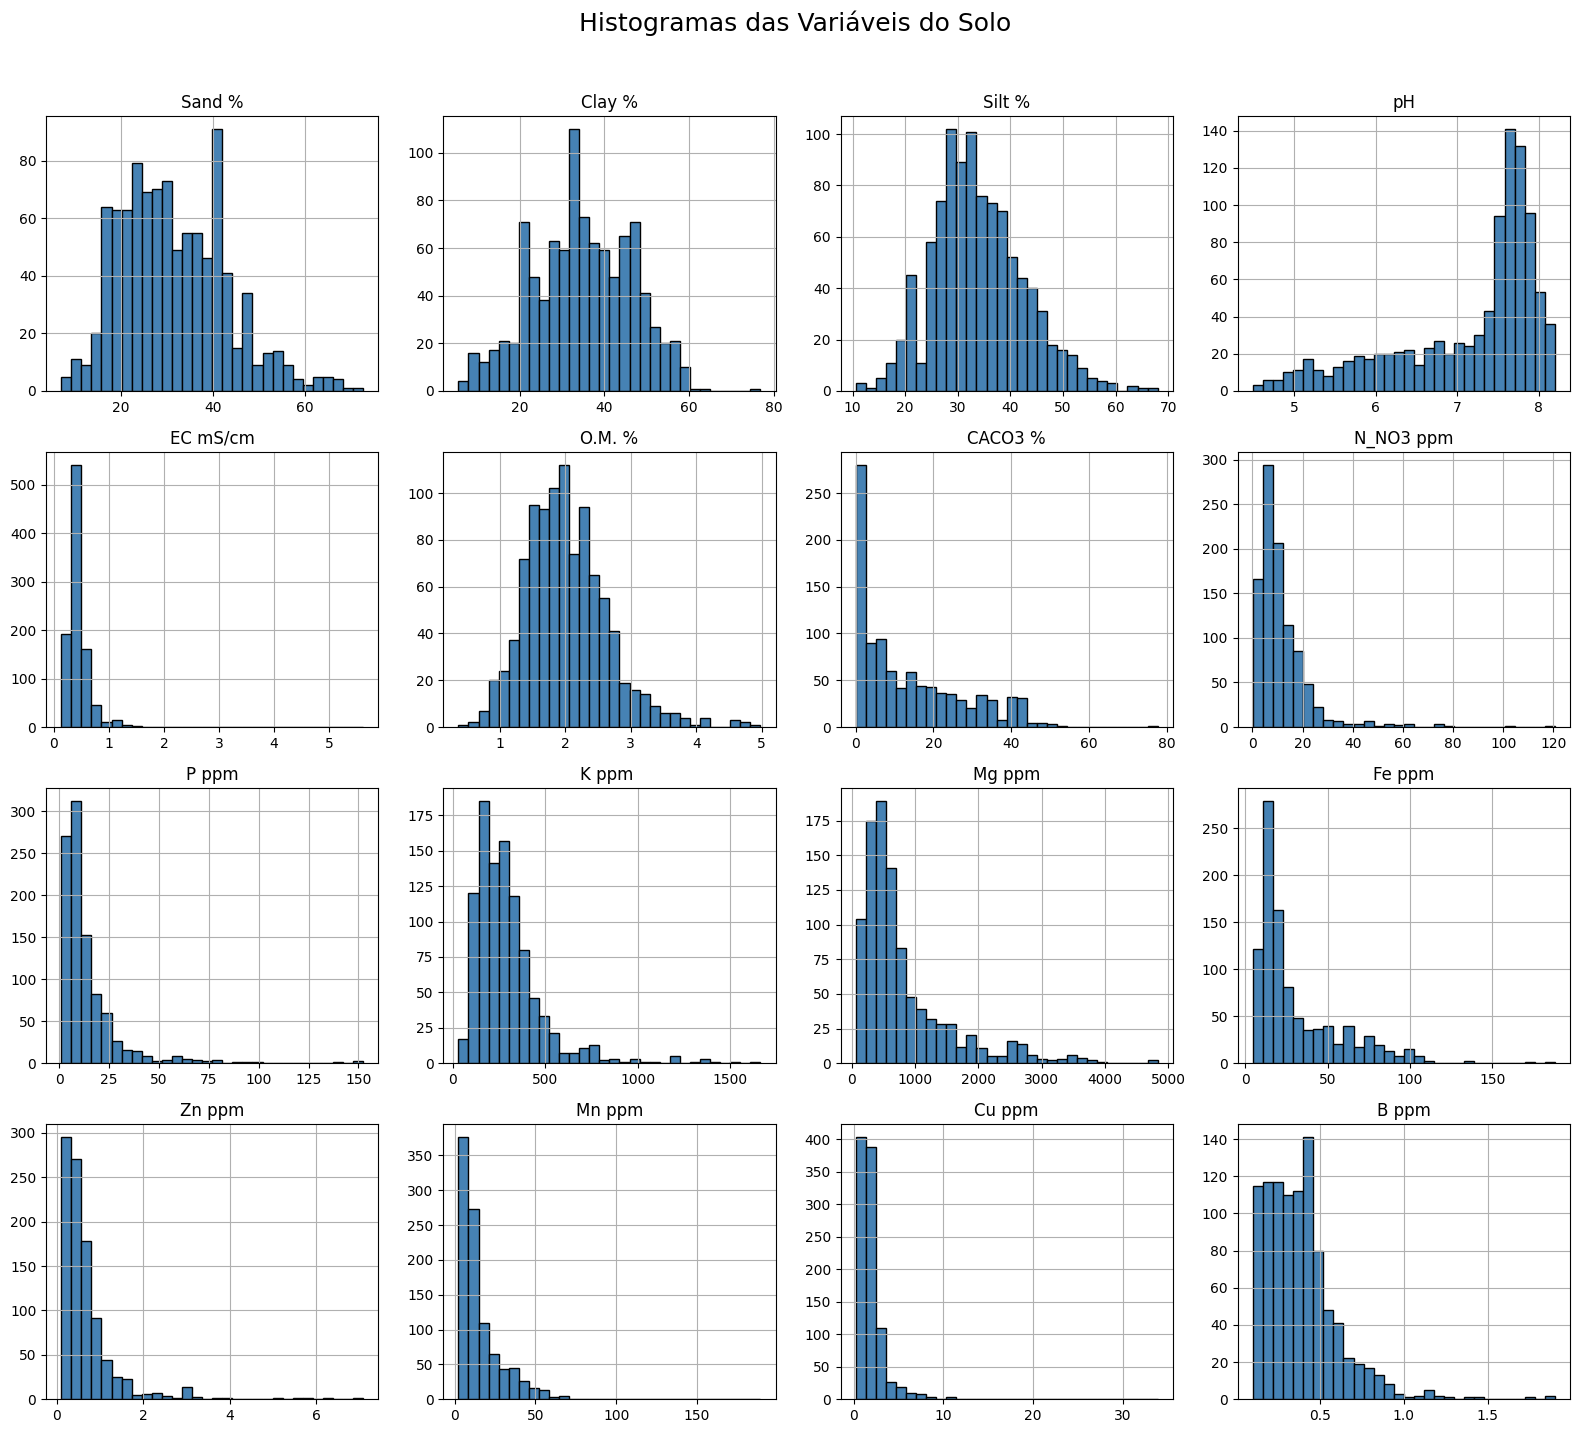

In [52]:
# Seleciona apenas os nomes das colunas numéricas, removendo a coluna de classe ("contaminated")
colunas_numericas = dados.drop(columns=["contaminated"]).columns

# Cria histogramas para todas as colunas numéricas selecionadas
# - figsize define o tamanho total da figura
# - bins define o número de intervalos em cada histograma
# - edgecolor define a cor do contorno das barras
# - color define a cor de preenchimento
dados[colunas_numericas].hist(figsize=(16, 14), bins=30, edgecolor="black", color="steelblue")

# Define o título geral da figura, aumenta o tamanho da fonte
# - y=1.02 posiciona o título um pouco acima do padrão para não sobrepor os gráficos
plt.suptitle("Histogramas das Variáveis do Solo", fontsize=18, y=1.02)

# Ajusta automaticamente espaçamentos para evitar que os rótulos e eixos se sobreponham
plt.tight_layout()

# Exibe todos os histogramas na tela
plt.show()


### Interpretação dos Histogramas das Variáveis do Solo

- **Sand %, Clay % e Silt %**: As distribuições das frações granulométricas (areia, argila e silte) são relativamente normais, concentradas em torno de valores médios, sem grande assimetria. Isso sugere solos de textura intermediária (franco-argilosos a franco-arenosos).

- **pH**: Distribuição concentrada principalmente entre 6,5 e 8, com pico próximo de 7,5–8. Isso indica que a maioria das amostras apresenta solos de reação neutra a levemente alcalina, com poucos casos de solos mais ácidos.

- **EC (mS/cm)**: Distribuição fortemente assimétrica à direita, com grande concentração de valores baixos (< 1), sugerindo que a maioria dos solos tem baixa condutividade elétrica, portanto baixa salinidade.

- **O.M. % (Matéria Orgânica)**: Distribuição próxima de normal, concentrada entre 1,5 e 3,0%, indicando teores médios de matéria orgânica no solo.

- **CaCO3 %**: Distribuição assimétrica à direita, com maioria dos solos apresentando valores baixos (< 10%), mas alguns outliers com valores mais elevados (> 40%).

- **N_NO3 ppm (Nitrato)**: Distribuição muito concentrada em valores baixos (< 10 ppm), com poucos solos apresentando teores mais altos.

- **Fósforo (P ppm)**: Distribuição altamente assimétrica, com predominância de valores muito baixos (< 20 ppm), sugerindo que muitos solos são pobres em fósforo disponível.

- **Potássio (K ppm)**: Distribuição concentrada em valores baixos a médios (< 300 ppm), mas com alguns casos muito altos (> 1000 ppm).

- **Magnésio (Mg ppm)**: Distribuição semelhante à do K, com maioria dos valores abaixo de 1000 ppm, mas presença de valores extremos elevados (> 3000 ppm).

- **Ferro (Fe ppm)**: Distribuição concentrada em valores baixos (< 50 ppm), com poucos outliers em concentrações maiores.

- **Zinco (Zn ppm), Cobre (Cu ppm) e Boro (B ppm)**: Todos apresentam distribuição fortemente assimétrica à direita, indicando que a maioria dos solos tem baixos teores desses micronutrientes, mas alguns apresentam concentrações elevadas.

- **Manganês (Mn ppm)**: Distribuição também assimétrica, com maior frequência em valores baixos (< 50 ppm), mas ocorrência de solos enriquecidos (> 100 ppm).

### Conclusão Geral
A maioria das variáveis químicas apresenta distribuições assimétricas à direita (com valores baixos predominantes e poucos valores muito altos). Isso indica que muitos solos da amostra são relativamente pobres em nutrientes, mas com ocorrência de alguns solos mais férteis. Já as variáveis físicas (areia, argila, silte) mostram distribuições mais equilibradas, enquanto o **pH indica solos predominantemente neutros a levemente alcalinos**.


## Análise das variáveis em relação às classes de contaminação

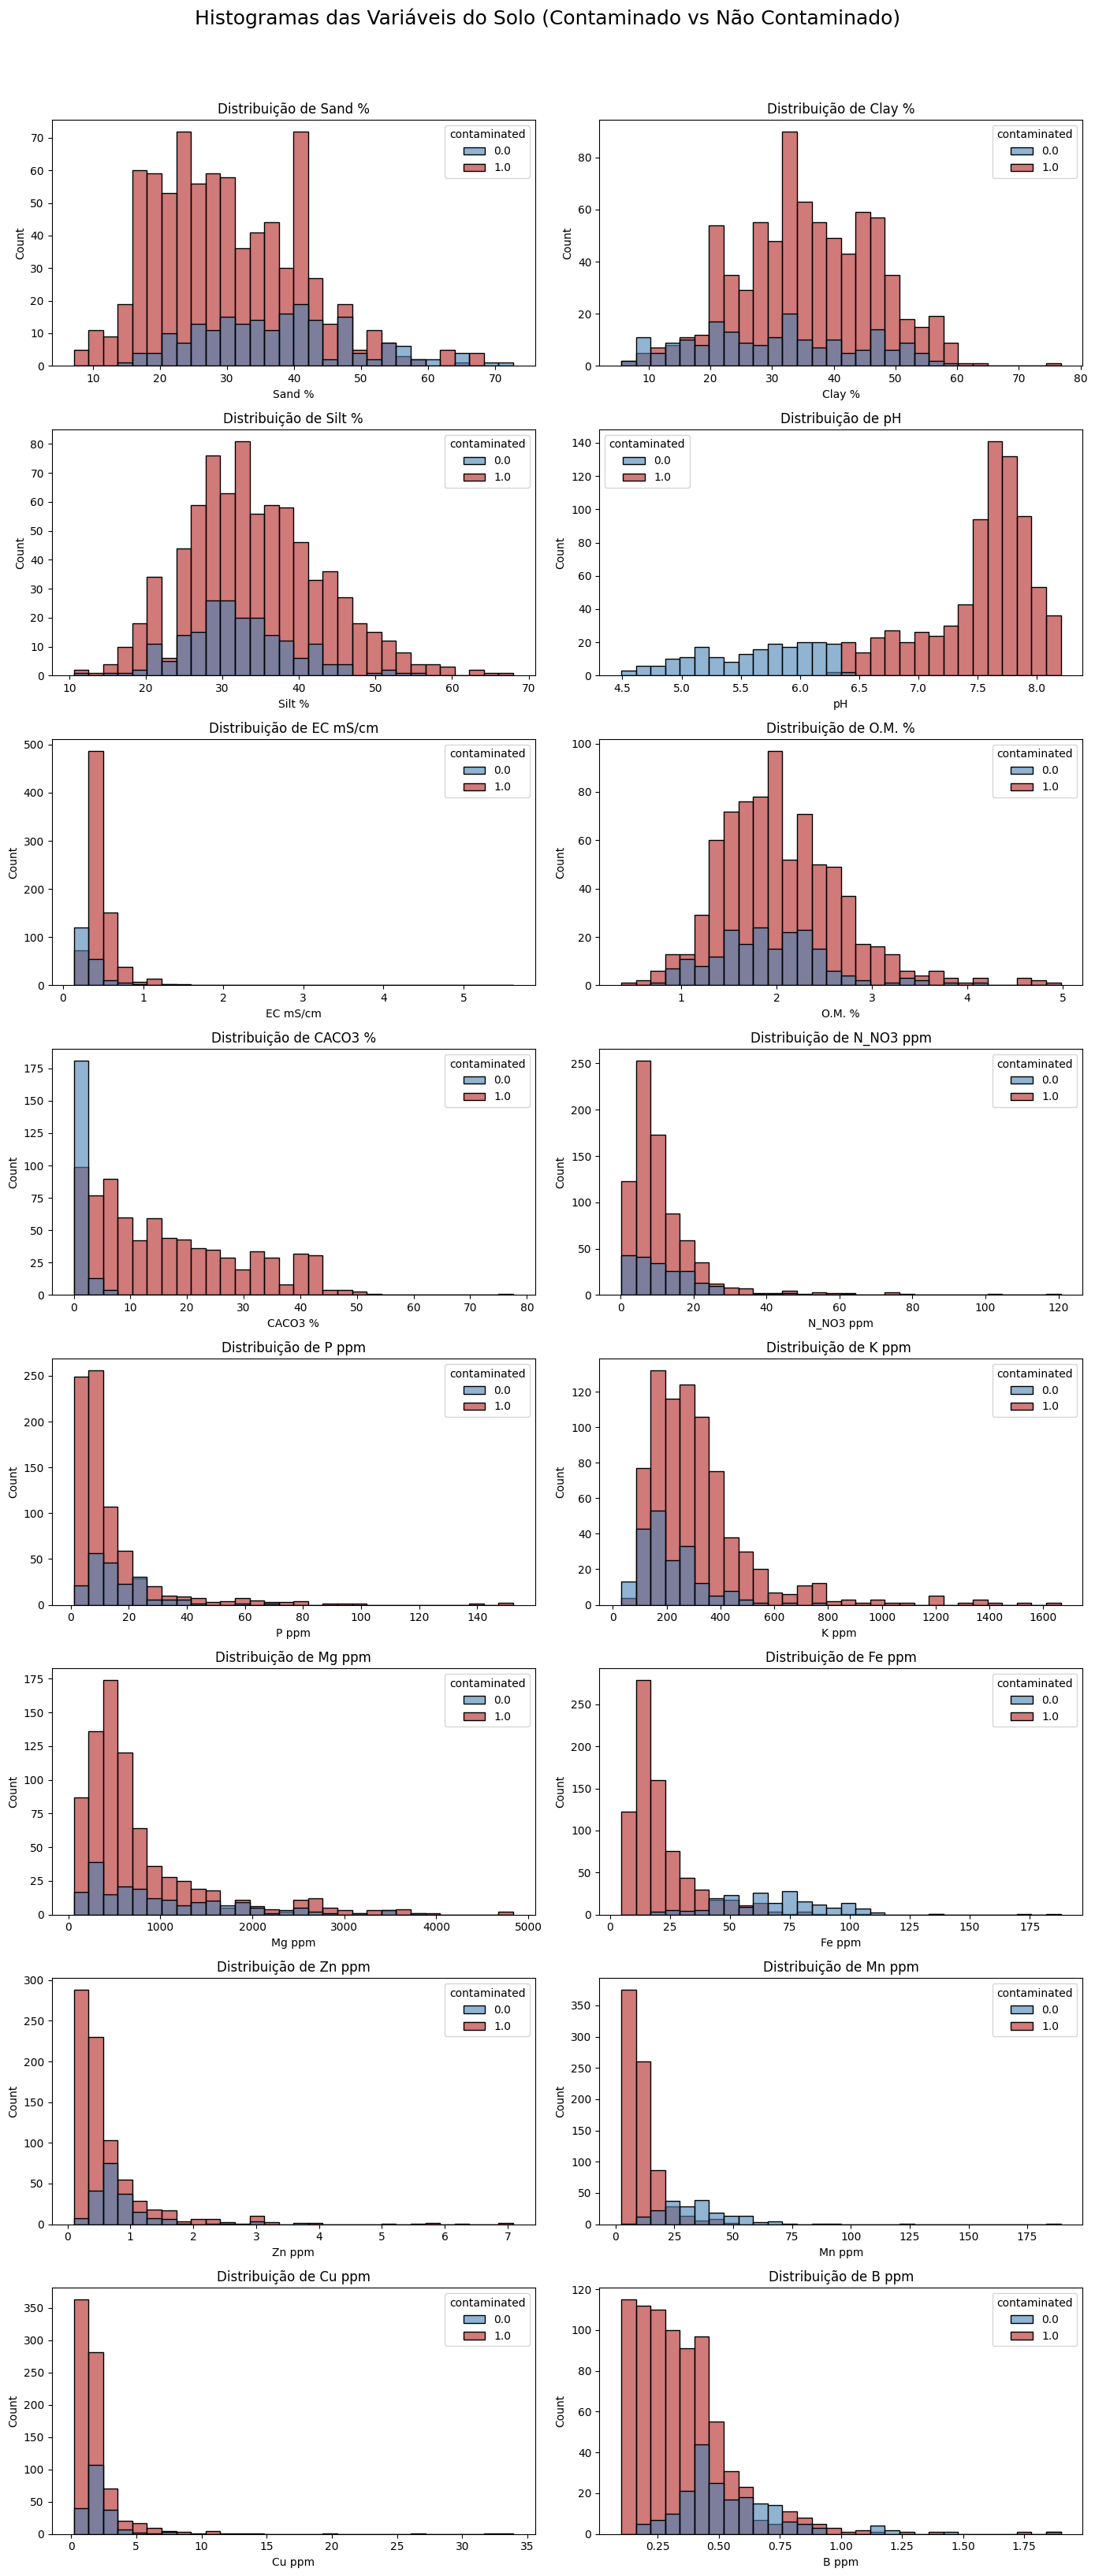

In [53]:
# Define layout da figura: 2 colunas de gráficos
n_colunas = 2
n_linhas = (len(colunas_numericas) + 1) // n_colunas

plt.figure(figsize=(14, 4 * n_linhas))

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(n_linhas, n_colunas, i)

    # Histogramas (contaminada vs não contaminada)
    sns.histplot(
        data=dados,
        x=coluna,
        hue="contaminated",   # separa por classe
        bins=30,
        edgecolor="black",
        palette={0: "steelblue", 1: "firebrick"},
        alpha=0.6
    )

    plt.title(f"Distribuição de {coluna}")

plt.suptitle("Histogramas das Variáveis do Solo (Contaminado vs Não Contaminado)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### Interpretação dos Histogramas

- **Granulometria (Sand %, Clay %, Silt %)**:  
  As distribuições de areia, argila e silte são muito parecidas entre contaminados e não contaminados.  
  - A **textura do solo não parece ser um fator determinante** na contaminação.

- **pH**:  
  Contaminados predominam nos valores **mais altos (~6,5–8,0)**, enquanto não contaminados  aparecem mais nas faixas **intermediárias (4,5–7,0)**.  
  - Isso sugere que a **contaminação é mais frequente em solos neutros a alcalinos**.

- **EC (mS/cm)**:  
  Ambos os grupos se concentram em valores baixos (< 1).

- **Matéria Orgânica (O.M. %)**:  
  As distribuições são bastante semelhantes, sem diferença clara.  
  - Matéria orgânica **não parece influenciar diretamente** a contaminação.

- **CaCO3 %**:  
  Contaminados aparecem em **valores mais altos de carbonato de cálcio**, enquanto não contaminados ficam mais concentrados em valores baixos.  
  - Contaminação com carbonato?

- **N_NO3 ppm**:  
  Há solos contaminados com **valores mais altos de nitrato**, porém a maioria possui valores semelhante aos não contaminados.  

- **Fósforo (P ppm)**:   
  Valores semelhantes entre as classes.

- **Potássio (K ppm)**:
 Há solos contaminados com **valores mais altos de K**, porém a maioria possui valores semelhante aos não contaminados.

- **Magnésio (Mg ppm)**:
  Valores semelhantes entre as classes.

- **Ferro (Fe ppm)**:
  Solos contaminados possuem menores concentrações de Fe.
  Será alguma relação com o contaminante?

- **Micronutrientes (Zn, Mn, Cu, B)**:  
  - **Zn**: Valores semelhantes  
  - **Mn**: Contaminados possuem menores concentrações.  
  - **Cu**: Valores semelhantes.
  - **B**: Contaminados possuem menores concentrações



## Teste de Mann–Whitney U

### O que é?
O **Mann–Whitney U** é um **teste não paramétrico** usado para **comparar duas amostras independentes**.  
Serve para saber se **os grupos têm distribuições diferentes**, sem precisar que os dados sejam normais.


### Interpretação
- **p < 0.05 →** há **diferença significativa** entre os grupos.  
- **p ≥ 0.05 →** **não há diferença** relevante.  

O teste compara **ranks (ordens)** em vez de médias — verifica se um grupo tende a ter **valores mais altos ou mais baixos** que o outro.


In [54]:
# Separa grupos de acordo com a variável de classe (contaminado ou não)
contaminado = dados[dados["contaminated"] == 1]      # Linhas onde contaminated = 1
nao_contaminado = dados[dados["contaminated"] == 0]  # Linhas onde contaminated = 0

# Lista para armazenar os resultados estatísticos de cada variável numérica
resultados = []

# Loop em cada variável numérica para calcular estatísticas descritivas e aplicar o teste de Mann–Whitney
for col in colunas_numericas:
    # Cálculo da média de cada grupo
    media_cont = contaminado[col].mean()
    media_nao = nao_contaminado[col].mean()

    # Cálculo do desvio padrão de cada grupo
    std_cont = contaminado[col].std()
    std_nao = nao_contaminado[col].std()

    # Teste de Mann–Whitney U (não paramétrico)
    stat, p_val = mannwhitneyu(contaminado[col], nao_contaminado[col], alternative='two-sided')

    # Guarda os resultados em um dicionário
    resultados.append({
        "Variável": col,
        "Média Contaminado": round(media_cont, 3),
        "Média Não Contaminado": round(media_nao, 3),
        "Std Contaminado": round(std_cont, 3),
        "Std Não Contaminado": round(std_nao, 3),
        "p-valor (Mann–Whitney)": round(p_val, 5)
    })

# Converte a lista de resultados em um DataFrame para visualização
df_resultados = pd.DataFrame(resultados)

# Exibe os resultados ordenados pelo p-valor (da menor diferença para a maior)
df_resultados.sort_values(by="p-valor (Mann–Whitney)", inplace=True)


In [55]:
df_resultados

,Variável,Média Contaminado,Média Não Contaminado,Std Contaminado,Std Não Contaminado,p-valor (Mann–Whitney)
0,Sand %,30.066,37.422,10.861,11.625,0.00000
1,Clay %,35.849,30.769,10.858,13.276,0.00000
3,pH,7.532,5.627,0.428,0.494,0.00000
4,EC mS/cm,0.482,0.342,0.295,0.227,0.00000
6,CACO3 %,16.750,1.045,13.251,1.277,0.00000
11,Fe ppm,21.195,68.695,14.618,24.058,0.00000
9,K ppm,318.238,209.172,204.755,113.134,0.00000
8,P ppm,13.496,15.827,16.235,10.011,0.00000
14,Cu ppm,1.957,2.096,2.506,1.115,0.00000
13,Mn ppm,10.674,35.210,7.152,19.231,0.00000


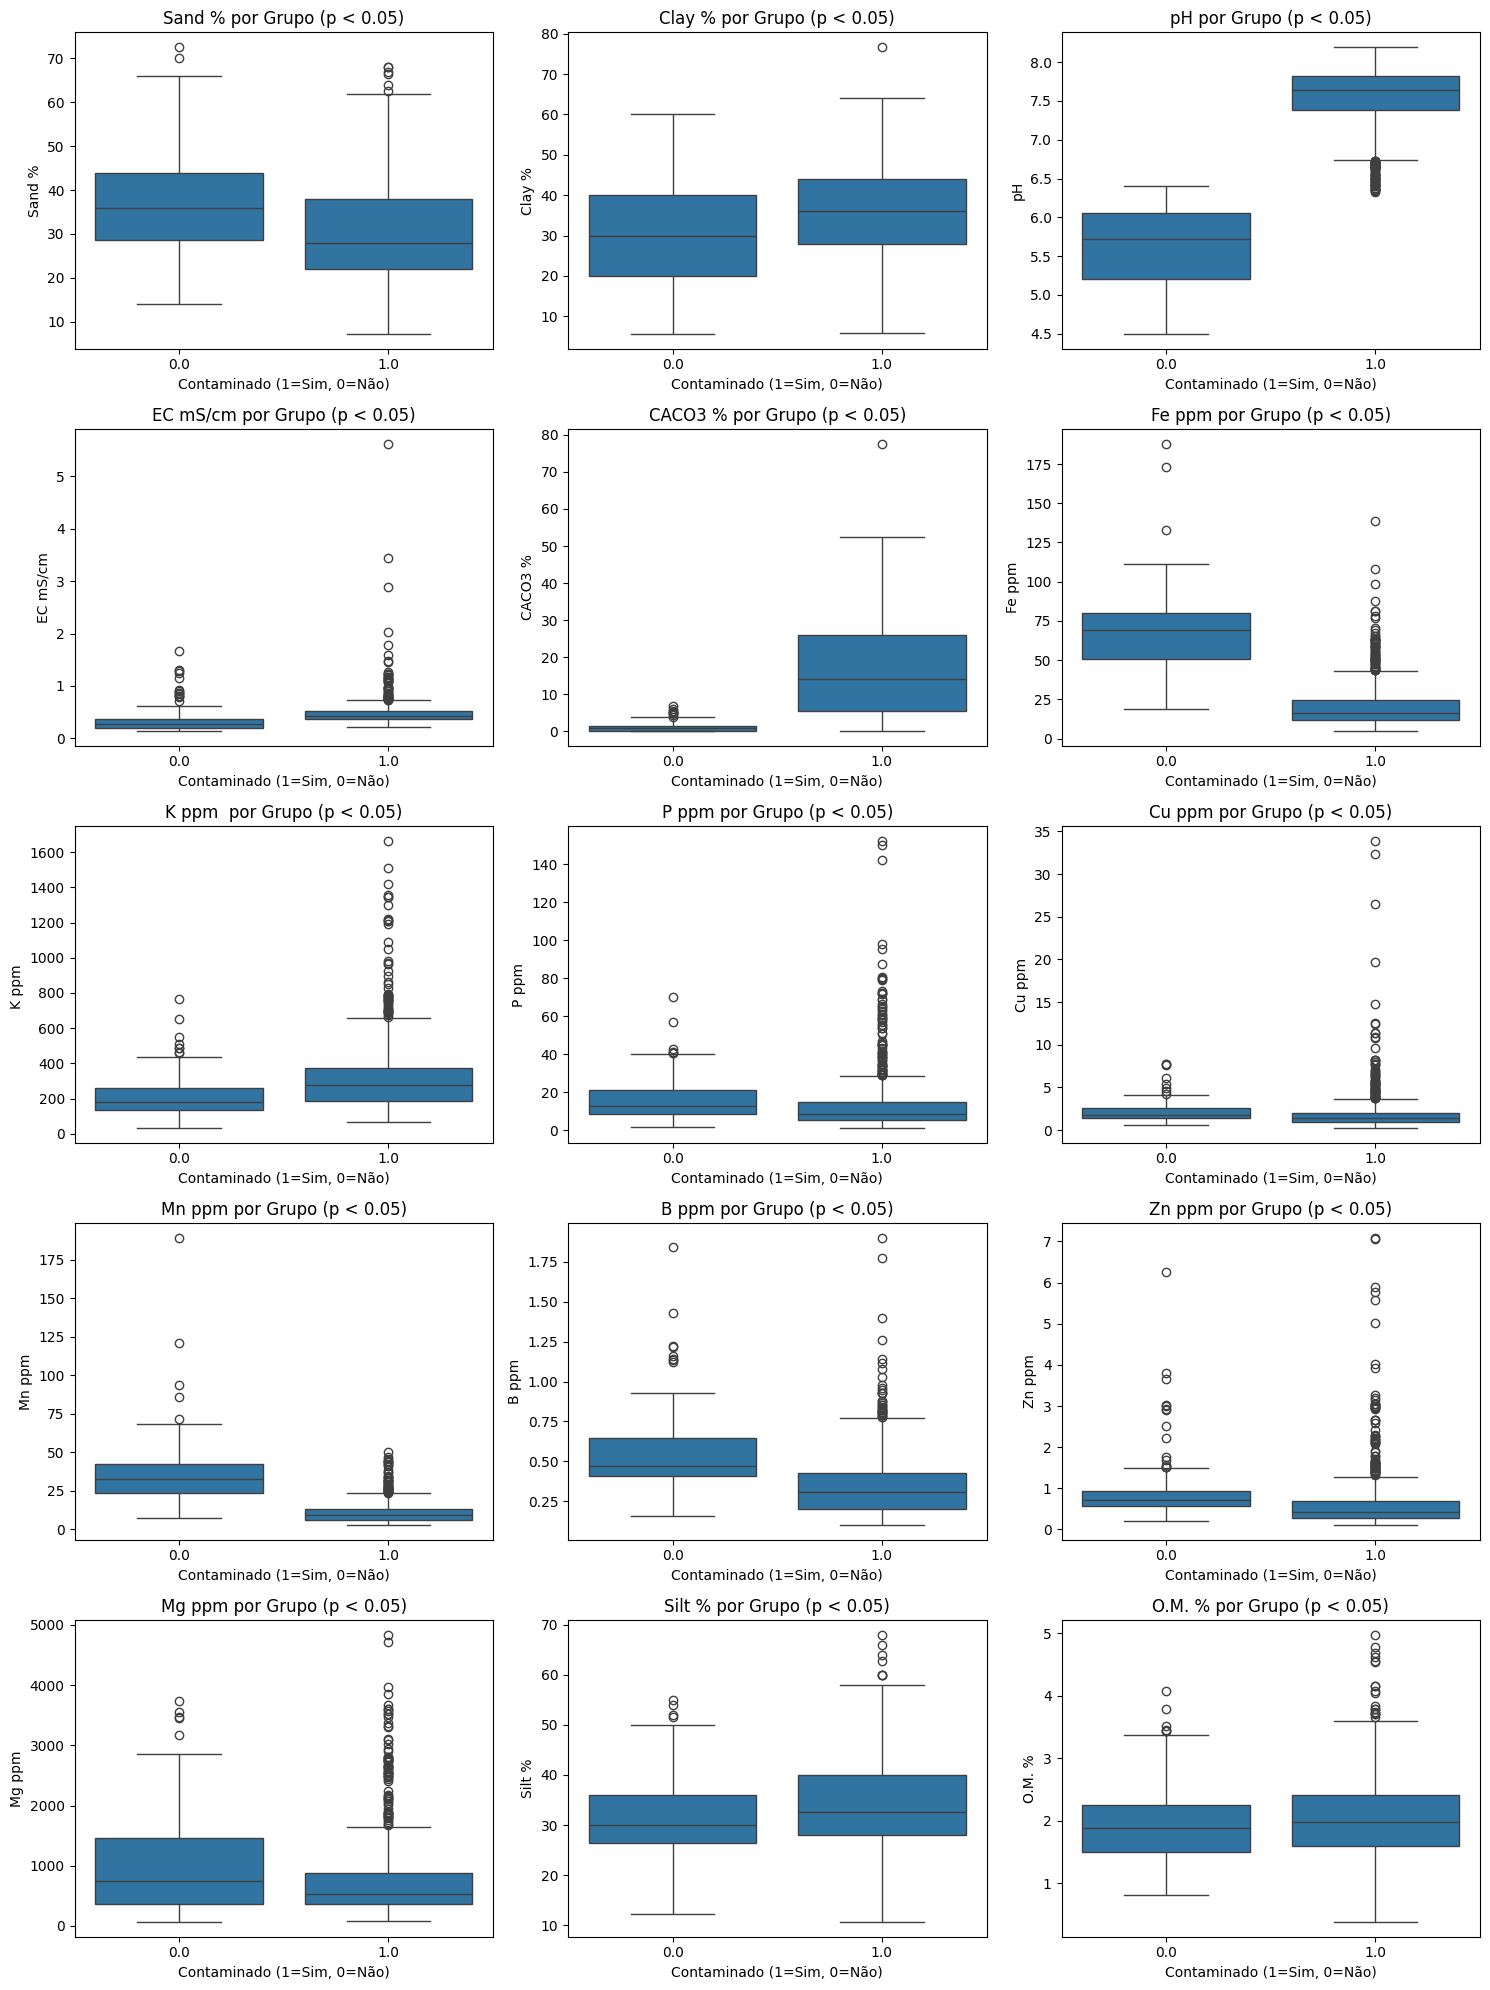

In [56]:
# Seleciona apenas as variáveis significativas
variaveis_signif = df_resultados[df_resultados["p-valor (Mann–Whitney)"] < 0.05]["Variável"]

# Define o número de colunas e linhas de acordo com a quantidade de variáveis
n_cols = 3
n_rows = math.ceil(len(variaveis_signif) / n_cols)

# Cria a grade de subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # transforma em lista para indexar facilmente

# Loop para preencher cada subplot
for i, var in enumerate(variaveis_signif):
    sns.boxplot(data=dados, x="contaminated", y=var, ax=axes[i])
    axes[i].set_title(f"{var} por Grupo (p < 0.05)")
    axes[i].set_xlabel("Contaminado (1=Sim, 0=Não)")
    axes[i].set_ylabel(var)

# Remove subplots vazios (se sobrar espaço na grade)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Interpretação dos Resultados – Teste de Mann–Whitney

### **Textura do Solo**
- **Sand %:** significativamente **menor** em áreas contaminadas (30.1 vs 37.4; p<0.001).  
- **Clay %:** significativamente **maior** em contaminados (35.8 vs 30.8; p<0.001).  
- **Silt %:** também **ligeiramente maior** em contaminados (34.1 vs 31.8; p=0.0019).  

> Solos mais argilosos e siltosos apresentam **maior capacidade de reter contaminantes** (metais, íons e compostos orgânicos), devido à sua **maior área superficial e carga negativa** nas partículas de argila.

---

### **Química Geral**
- **pH:** significativamente mais **alto** em contaminados (7.53 vs 5.63; p<0.001), indicando **alcalinização** do meio.  
- **EC (mS/cm):** condutividade **mais alta** (0.48 vs 0.34; p<0.001), sugerindo **maior concentração de sais dissolvidos**.  

> O aumento do pH e da condutividade elétrica indica **alteração química do solo**, possivelmente associada ao **aporte de resíduos alcalinos** ou **soluções salinas**.

---

### **Carbonatos e Matéria Orgânica**
- **CaCO₃ %:** extremamente mais elevado em solos contaminados (16.75 vs 1.05; p<0.001), evidenciando **forte influência de materiais carbonáticos**.  
- **O.M. %:** levemente superior em contaminados (2.05 vs 1.91; p=0.013).  

> O alto teor de carbonatos sugere **entrada de resíduos ricos em cálcio** ou **precipitação de carbonatos** em ambiente alcalino.  
> A matéria orgânica ligeiramente maior pode **aumentar a retenção de contaminantes** por complexação com compostos orgânicos.

---

### **Nutrientes**
- **K ppm:** significativamente **maior** em solos contaminados (318 vs 209; p<0.001).  
- **P ppm:** **menor** nos contaminados (13.5 vs 15.8; p<0.001), ainda que a diferença seja pequena.  
- **N_NO₃ ppm:** **sem diferença significativa** (11.35 vs 11.69; p=0.26).  

> O potássio elevado pode refletir **acúmulo de sais solúveis**, enquanto o fósforo mais baixo pode indicar **fixação sob pH alcalino**.  
> O nitrato, **não diferencia** os grupos.

---

### **Metais**
- **Fe, Mn, Zn, B, Mg:** todos significativamente **menores** nos solos contaminados (p<0.05), com destaque para **Fe** (21.2 vs 68.7 ppm) e **Mn** (10.7 vs 35.2 ppm).  
- **Cu ppm:** sem diferença significativa (1.96 vs 2.10; p>0.05).  

> A redução desses elementos nos contaminados está associada à **menor solubilidade em pH alto**, onde metais como Fe, Mn e Zn **precipitam como hidróxidos**, tornando-se menos disponíveis.

---

## **Conclusão**
Os solos classificados como **contaminados** apresentam uma **assinatura geoquímica e física típica de ambientes alcalinizados e salinizados**, caracterizada por:

- **pH elevado** e **maiorcondutividade elétrica**,  
- **abundância de carbonatos (CaCO₃)**,  
- **textura mais argilosa e siltosa**,  
- **aumento de K** e **redução de micronutrientes metálicos (Fe, Mn, Zn, B, Mg)**.  

> Esses padrões indicam que a contaminação está associada a **processos de alcalinização e salinização**, possivelmente ligados à deposição de **resíduos ricos em sais e carbonatos**, que modificam o equilíbrio químico do solo e **reduzem a disponibilidade de micronutrientes essenciais**.


# Machine Learning

## Divisão em treino e teste

Primeiro, é necessário dividir os dados em **treino** e **teste**.  

**Por quê?**  
- O conjunto de **treino** é usado para ajustar o modelo, ou seja, para que ele aprenda os padrões e relações entre as variáveis.  
- O conjunto de **teste** é usado para avaliar o desempenho do modelo em dados **nunca vistos antes**, simulando como ele se comportaria no mundo real.  

Se usássemos os mesmos dados para treinar e testar, correríamos o risco de obter uma avaliação **irrealisticamente boa**, pois o modelo já teria "decorado" aqueles exemplos. Esse problema é conhecido como **overfitting**.  

Portanto, separar os dados garante uma avaliação mais justa e confiável da capacidade de generalização do modelo.


In [57]:
# Define as variáveis independentes (features) para treinar o modelo
# Remove a coluna "contaminated", pois ela é a variável alvo e não deve entrar como preditora
X = dados.drop(columns=["contaminated"])

# Define a variável dependente (target), que queremos prever
# Nesse caso, a coluna "contaminated" indica se o solo está contaminado (1) ou não (0)
y = dados["contaminated"]

In [58]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% dos dados vão para o conjunto de teste, 80% para treino
    random_state=42,    # Define uma semente fixa para reprodutibilidade dos resultados
    stratify=y          # Garante que a proporção de classes (0 e 1) seja a mesma em treino e teste
)

### Por que usar `stratify=y`?

- Se dividirmos **sem `stratify`**, o conjunto de teste pode ficar com poucas ou nenhuma amostra da classe minoritária.  
- Com **`stratify=y`**, a divisão mantém a **mesma proporção de classes** em treino e teste.  

Exemplo (1000 amostras: 200 contaminadas e 800 não contaminadas):  
- **Treino (80%)** → 160 contaminadas / 640 não contaminadas  
- **Teste (20%)** → 40 contaminadas / 160 não contaminadas  

Assim, ambos os conjuntos continuam representativos da realidade.


### Padronização dos dados (StandardScaler)

Antes de treinar o modelo KNN, os dados foram **padronizados** para que cada variável tenha
média 0 e desvio padrão 1. Essa etapa é essencial porque o KNN calcula distâncias entre
os pontos; se as variáveis estiverem em escalas diferentes (ex.: mg/kg e %), a variável com
maior amplitude dominaria a distância.

Em resumo, a padronização evita que variáveis em escalas diferentes influenciem de forma
indevida o cálculo das distâncias, melhorando a performance do KNN.


In [59]:

# Padronização dos dados (média = 0, desvio padrão = 1)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)  # Ajusta e transforma os dados de treino
X_test_sc = scaler.transform(X_test)        # Usa os parâmetros do treino para transformar o teste


### Validação cruzada

O código abaixo realiza a **escolha automática do número ideal de vizinhos (k)** para o algoritmo
K-Nearest Neighbors (KNN), garantindo o melhor desempenho de classificação:

1. Cria uma lista de valores de k de 1 a 25 (`ks`).
2. Para cada k:
   - Instancia um modelo KNN com esse número de vizinhos.
   - Executa **validação cruzada de 5 partes (cv=5)** usando os dados de treino já padronizados.
   - Calcula a **acurácia média** obtida nessa validação e armazena em `cv_scores`.
3. Compara as acurácias médias de todos os k testados e seleciona automaticamente o
   **k que apresentou a maior acurácia**, guardando o resultado em `k_otimo`.

Em resumo, o código testa k de 1 a 25, avalia o desempenho de cada um e retorna o
**melhor valor de k** para ser usado no modelo KNN final.


In [60]:
# Seleção do k ótimo (número de vizinhos) entre 1 e 25
ks = list(range(1, 26))
cv_scores = []  # Lista para armazenar a acurácia média em cada k
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)  # Cria o modelo KNN com k vizinhos
    scores = cross_val_score(knn, X_train_sc, y_train, cv=5, scoring="accuracy")  # Validação cruzada
    cv_scores.append(scores.mean())  # Salva a média da acurácia para esse k

# Define o k com melhor desempenho na validação cruzada
k_otimo = ks[int(np.argmax(cv_scores))]

### Treinamento e previsão com o KNN

Agora que o melhor valor de **k** já foi definido, este código:

1. **Treina o modelo definitivo**
   - `knn_final = KNeighborsClassifier(n_neighbors=k_otimo)`  
     Cria o classificador KNN usando o k ótimo.
   - `knn_final.fit(X_train_sc, y_train)`  
     Ajusta o modelo aos dados de treino já padronizados.

2. **Faz previsões no teste**
   - `y_pred = knn_final.predict(X_test_sc)`  
     Usa o modelo treinado para prever a classe de cada amostra do conjunto de teste.

Em resumo, é aqui que o KNN final é treinado e gera as previsões que serão avaliadas
nas próximas métricas.


In [61]:
# Treina o modelo final com o k ótimo encontrado
knn_final = KNeighborsClassifier(n_neighbors=k_otimo)
knn_final.fit(X_train_sc, y_train)

# Realiza previsões no conjunto de teste
y_pred = knn_final.predict(X_test_sc)

## Permutation Importance

A **Permutation Importance** (Importância por Permutação) é uma técnica para medir a relevância de cada variável no modelo de Machine Learning.  

O método funciona assim:  
1. Calcula-se a performance original do modelo no conjunto de teste.  
2. Embaralha-se (permuta) os valores de **uma variável por vez**, quebrando sua relação com a variável alvo.  
3. Mede-se novamente a performance do modelo.  
4. A queda no desempenho indica o quanto aquela variável era **importante**.  



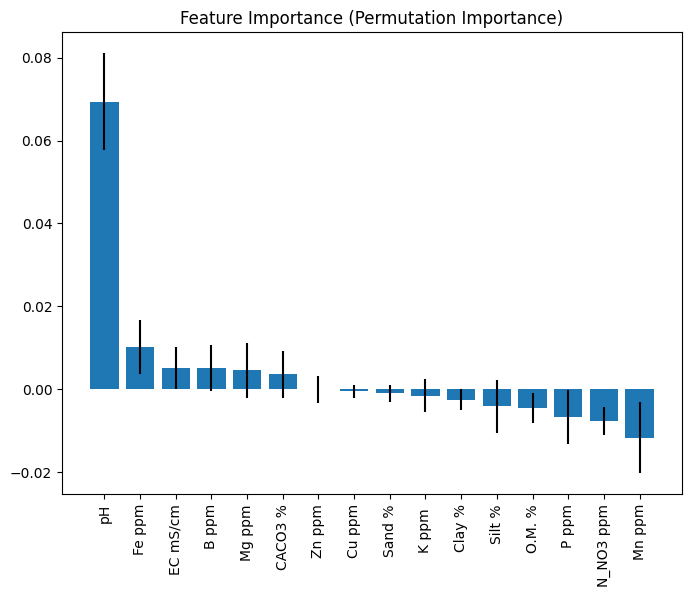

In [62]:
# Calcula a importância das variáveis pelo método de Permutação no conjunto de teste
# A ideia é medir quanto a performance do modelo cai quando embaralhamos uma variável
result = permutation_importance(knn_final, X_test_sc, y_test, n_repeats=10, random_state=42)

# Pega a média da importância de cada variável (quanto afeta o modelo ao ser embaralhada)
importances = result.importances_mean
# Pega o desvio padrão das importâncias (variabilidade nas repetições)
std = result.importances_std
# Ordena os índices das variáveis pela importância (da maior para a menor)
indices = importances.argsort()[::-1]

# Cria a figura do gráfico
plt.figure(figsize=(8,6))
# Plota um gráfico de barras com as importâncias ordenadas
plt.bar(range(X_train_sc.shape[1]), importances[indices], yerr=std[indices], align="center")
# Coloca os nomes das variáveis no eixo X, rotacionados para caber
plt.xticks(range(X_train_sc.shape[1]), X_train.columns[indices], rotation=90)
# Define o título do gráfico
plt.title("Feature Importance (Permutation Importance)")
# Mostra o gráfico
plt.show()


### Interpretação da Importância das Variáveis (Permutation Importance)

- **pH** → é disparado a variável mais importante no modelo, apresentando maior impacto na queda de desempenho quando embaralhado.  

- **Fe (Ferro, ppm)** → aparece como segunda variável mais relevante, embora bem abaixo do pH.  
- Indica que a concentração de ferro também tem influência na contaminação.

- **EC (Condutividade elétrica), B (Boro), Mg (Magnésio) e CaCO3 (%)** → têm impacto menor, mas ainda positivo.  
- Mostram que alguns parâmetros químicos do solo contribuem parcialmente para a diferenciação.

- **Demais variáveis (Zn, Cu, Areia, Argila, Silte, Fósforo, Nitrato etc.)** → apresentam importâncias próximas de zero ou negativas.  
- Isso indica que, dentro do modelo KNN, elas **não tiveram grande papel preditivo** ou não melhoraram a separação entre contaminados e não contaminados.



### Avaliação do modelo KNN

Nesta etapa são calculadas as métricas de avaliação do modelo KNN já treinado.
Primeiro é obtida a acurácia, que mostra a porcentagem total de acertos do modelo no conjunto de teste.
Em seguida é gerada a matriz de confusão, que revela onde ocorreram acertos e erros, mostrando, por exemplo, quantos contaminados foram classificados corretamente e quantos não contaminados foram confundidos.
Por fim é criado um relatório de classificação, que resume para cada classe os valores de precision, recall e f1-score, além das médias gerais.
Essas informações permitem avaliar com mais detalhe a qualidade das previsões


In [63]:
# Calcula métricas de avaliação
acc = accuracy_score(y_test, y_pred)             # Acurácia
cm = confusion_matrix(y_test, y_pred)            # Matriz de confusão
report = classification_report(y_test, y_pred, digits=3, output_dict=True)  # Relatório detalhado

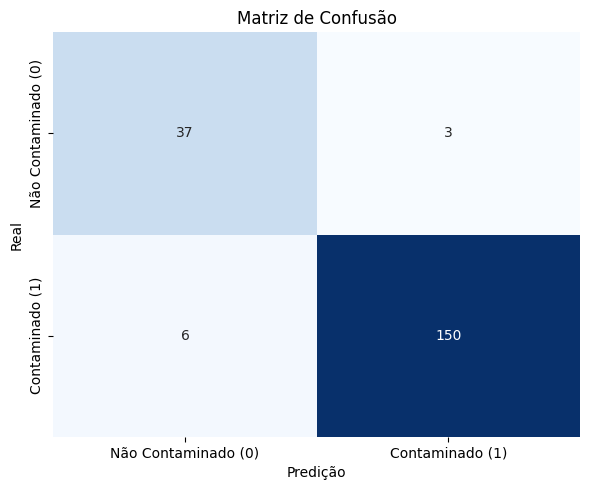

In [64]:
# Cria uma nova figura e define o tamanho (largura=6, altura=5 polegadas)
plt.figure(figsize=(6, 5))

# Desenha o heatmap (mapa de calor) da matriz de confusão
ax = sns.heatmap(
    cm,                      # 'cm' é a matriz 2x2 com contagens (TN, FP / FN, TP)
    annot=True,              # Escreve os valores dentro das células
    fmt="d",                 # Formata os valores anotados como inteiros (decimal)
    cmap="Blues",            # Paleta de cores do mapa de calor
    cbar=False,              # Remove a barra de cores à direita (opcional)
    xticklabels=["Não Contaminado (0)", "Contaminado (1)"],  # Rótulos do eixo X (Predição)
    yticklabels=["Não Contaminado (0)", "Contaminado (1)"]   # Rótulos do eixo Y (Classe real)
)

# Define o rótulo do eixo X (o que o modelo previu)
plt.xlabel("Predição")
# Define o rótulo do eixo Y (o valor real/verdadeiro)
plt.ylabel("Real")
# Título do gráfico
plt.title("Matriz de Confusão")
# Ajusta automaticamente margens e espaçamentos para não cortar textos
plt.tight_layout()
# Exibe o gráfico na tela
plt.show()

### Interpretação da matriz de confusão

- **37** amostras **não contaminadas** foram previstas corretamente.  
- **3** amostras **não contaminadas** foram classificadas **como contaminadas** (*falsos positivos*).  
- **150** amostras **contaminadas** foram previstas corretamente.  
- **6** amostras **contaminadas** foram classificadas **como não contaminadas** (*falsos negativos*).

Em resumo, o modelo apresenta **bom desempenho geral**, com poucos erros.  


In [65]:
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score     support
0.0            0.860465  0.925000  0.891566   40.000000
1.0            0.980392  0.961538  0.970874  156.000000
accuracy       0.954082  0.954082  0.954082    0.954082
macro avg      0.920429  0.943269  0.931220  196.000000
weighted avg   0.955917  0.954082  0.954689  196.000000


### Relatório de classificação

O relatório (`classification_report`) apresenta métricas que avaliam a qualidade do modelo em cada classe:

- **Precision (precisão)**  
  Mede **a pureza das previsões positivas**.  
  Entre as amostras que o modelo **previu** como pertencentes a uma classe, quantas realmente pertencem a ela.  
  - Fórmula: `TP / (TP + FP)`  
    - *TP* = verdadeiros positivos  
    - *FP* = falsos positivos  
  - Ex.: `precision = 0.86` para a classe 0 significa que, de todas as amostras previstas como “não contaminado”, 86 % realmente não eram contaminadas.  
  - Quanto maior a precisão, menor a chance de o modelo gerar falsos alarmes.

- **Recall (revocação ou sensibilidade)**  
  Mede **a capacidade de encontrar todos os casos reais** de uma classe.  
  Entre as amostras que **de fato pertencem** a uma classe, quantas o modelo conseguiu identificar corretamente.  
  - Fórmula: `TP / (TP + FN)`  
    - *FN* = falsos negativos  
  - Ex.: `recall = 0.93` para a classe 0 significa que 93 % das amostras realmente não contaminadas foram reconhecidas como tal.  
  - Quanto maior o recall, menor a chance de deixar casos reais sem detectar.

- **F1-score**  
  É a **média harmônica** entre precision e recall, equilibrando os dois indicadores.  
  Útil quando se quer um compromisso entre evitar falsos positivos e falsos negativos.

Métricas globais:
- **Accuracy** – taxa geral de acertos (≈95 %).  
- **Macro avg** – média simples entre as classes, sem levar em conta desbalanceamento.  
- **Weighted avg** – média ponderada pelo número de amostras de cada classe, representando melhor o desempenho total.

**Resumo:**  
O modelo apresenta alta precisão e alto recall, ou seja, além de prever corretamente a maioria das amostras positivas, também encontra quase todos os casos reais, resultando em excelente desempenho geral.


### Relatório de Classificação – Interpretação

- **Classe 0 (Não Contaminado):**
  - **Precisão (precision) = 0.86** → Quando o modelo prevê "não contaminado", 86% das vezes está correto.  
  - **Recall = 0.93** → O modelo consegue identificar 93% dos não contaminados reais.  
  - **F1-score = 0.89** → Equilíbrio entre precisão e recall.  

- **Classe 1 (Contaminado):**
  - **Precisão = 0.98** → Quando o modelo prevê "contaminado", quase sempre acerta (98%).  
  - **Recall = 0.96** → Ele encontra 96% de todos os contaminados reais.  
  - **F1-score = 0.97** → Excelente desempenho nessa classe.  

---

### Métricas Globais
- **Acurácia = 0.95 (95%)** → O modelo acertou 95% das previsões no total.  
- **Macro avg** → Média simples entre as duas classes: bom equilíbrio, mostrando que ambas são bem tratadas.  
- **Weighted avg** → Média ponderada pelo número de amostras em cada classe (mais contaminados). Resultado praticamente igual à acurácia.  


### E agora? O que fazer com o Modelo?

Depois de treinar, validar e avaliar o desempenho do modelo, o próximo passo é o **Deploy!**


### O que é Deploy?

**Deploy** (ou implantação) é o processo de **colocar o modelo em produção**, ou seja, disponibilizá-lo para ser usado fora do ambiente de treinamento.

Na prática, significa que o modelo deixa de ser apenas um experimento em notebooks e passa a estar acessível para **usuários, sistemas ou aplicações**.  

---

### Vamos testar?
https://contaminacaosolo.streamlit.app/
